# Julia study group
Feel free to play around with these files as much as you need. If you find something nice, you can add it as well.

All other information is in the readme file.

# Julia basics
A first general impression is that Julia is less typing friendly (difficult characters) but does have some nice short hand notations as well.

Julia has the same shallow copy shenanigans (just try copying dictionaries and nested dictionaries, I dare you, I double dare you).

Julia seems to be a bit difficult about reusing variables and functions (which might be safer actually). Although it is possible to define a function multiple times which is particularly usefull in case of different input types.

An important resource is the Julia Documentation: https://docs.julialang.org/en/v1/
For Python-experienced users, an interesting part is the differences between the two languages: https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-Python

## Values

None in Python is replaced by nothing in Julia.

## Strings
You have to use "", you can't use ''.

In julia you can concatenate strings with string(). It is also possible to use * (as opposed to + in Python) but it might look weird for people who look at your code.

In Julia it is easy to add variables in a string by using $

In Python that is less clean:

my_var = 5

print(f"The value of my_var is {my_var}.")

In [2]:
concat1="one"
concat2="two"
concatstr=concat1*" "*concat2

"one two"

In [14]:
abc=["a","b","c"]
for letter in abc
    print("the next letter is $letter")
    println(string(" or ","the next letter is ",letter))
end

the next letter is a or the next letter is a
the next letter is b or the next letter is b
the next letter is c or the next letter is c


'' is used to automatically create strings or symbols

In [3]:
string.('a':'e')

5-element Vector{String}:
 "a"
 "b"
 "c"
 "d"
 "e"

Special characters are added by means of the backslash. That can also be used for quotes in strings (\" instead of something like ' ). That also means that the backslash itself needs a backslash (\\ instead of \). The same does not hold for forwardslash.

advanced: you can also use rawstring to avoid the use of \ [insert link here]

In [4]:
stringaling="this is a \"quote\" in a string"
print(stringaling)

this is a "quote" in a string

## Dictionaries
Dictionaries cannot be created with {}

use pop!(dict,key) similar to dict.pop(key)

In [15]:
books=Dict()
books["hp"]=7
println(books,"\n")
p=pop!(books,"hp")
println(p)
books

Dict{Any, Any}("hp" => 7)

7


Dict{Any, Any}()

In [2]:
stripboeken=["jommeke","alleen","RIP"]
stripvolumes=[150,12,4]
stripauteurs=["herge denk ik","geen idee","te lui om te checken"]
stripcitaat=stripboeken.*" van ".*stripauteurs
strips=Dict(stripcitaat .=> stripvolumes)

Dict{String, Int64} with 3 entries:
  "jommeke van herge denk ik"    => 150
  "RIP van te lui om te checken" => 4
  "alleen van geen idee"         => 12

## Arrays

Julia is one indexed

In [16]:
A=rand(4,2)
B=zeros(4,2)
for i in 1:4, j in 1:2
    B[i,j]=i*j
end
B=[i*j for i in 1:4, j in 1:2]
C=round.(B-A)

4×2 Matrix{Float64}:
 0.0  1.0
 2.0  3.0
 2.0  6.0
 4.0  8.0

## print
You can just use print but apparently you typically use println. At least in Jupyter, print doesn't automatically add "\n" at the end while println does.

In [9]:
# single line comment
#=
multi line comment
=#
print("a")
print("b","\n")
println("a")
println("b")

ab
a
b


## Conditions
if/elseif/else is similar to loops; remove the ":" and add the "end" at the very end

a ? b : c equals to if a then b else c

&& is used for and but does not continue if the first argument is already false

true and false are with lower case letters

In [12]:
4>5 && println("4 is bigger than 5")
5>4 && println("5 is bigger than 4")

5 is bigger than 4


Julia is a little bit more strict on its types than python; you cannot use nothing and int/float as booleans, you need to be more specific by checking the types.

In [9]:
thanksfor="your contribution"#nothing

if thanksfor != nothing
    println("thanks for ",thanksfor)
else
    print("thanks for nothing")
end

thanks for your contribution


In [13]:
ni=5
nitarget=7
ti=16
titarget=NaN

firatios=(!isnan(nitarget) ? ni/nitarget : 0.0, !isnan(titarget) ? ti/titarget : 0.0)
finish=maximum(firatios)#use findmax to also get the index

0.7142857142857143

In python you can use check for None; it automatically converts to a boolean. In Julia you need to be more explicit. You can check for nothing.

## loops
for i in range(1,10):

becomes

for i in 1:10

end

In [11]:
for i in 1:10
    print(i)
end

12345678910

## functions
also similar to loops (no ":" but "end" at the end)

! is used to alter the original list (example sort() vs sort!())

. is used to use the function on multiple elements (example round.(A))

In [17]:
function xyz(abc)
    for letter in abc
        print("the next letter is $letter")
        println(string(" or ","the next letter is ",letter))
    end
end
xyz(["d","e","f"])

the next letter is d or the next letter is d
the next letter is e or the next letter is e
the next letter is f or the next letter is f


In [18]:
y(x)=x^2
y(2)

4

In [19]:
f=x->x^3
f(3)

27

In [20]:
a=[1,5,4]
println(string("This is the sorted array b=",sort(a)))
println(string("But the original a remains unharmed a=",a))
sort!(a)
println(string("Unless you use ! a=",a))


This is the sorted array b=[1, 4, 5]
But the original a remains unharmed a=[1, 5, 4]
Unless you use ! a=[1, 4, 5]


Kwargs work a little different as well. ;D... is used instead of **D. Also, it is important to use symbols (:A) instead of strings ("A") for your dictionary.

The ... is not necessary if you simply access one of the keyword arguments.

In [7]:
function kiwi(;a=1,b=2)
    println(a+b)
end
kwargs=Dict(:a=>2,:b=>3)
kiwi()
kiwi(;a=5)
kiwi(;kwargs...)

3
7
5


## Parallellism?

## Object oriented programming?
There are different types and function; in the function you disclose which types to use.
Multiple dispatch (not only first argument "self")

# Packages

## using and import

Within a module you can use the import statement but in Julia it is more common to use "using". Import can only be used at the beginning, within a function you need to use "using" anyway. In JuMP, for example, you need to use "using" because then the command "@variable" becomes available.

(not 100% sure about these statements but in general "using" is better)

## Package manager

For the next part of the Jupyter notebook you might want to install some additional packages. We will use the package manager.

In python you typically use pip to install a package. In Julia you use the build in package manager. In the terminal first type

julia

Once in julia you type

]

to go in the package manager mode (use backspace to return to normal mode). In package manager mode you can install a package simply through

add packagename

Alternatively, you can write a script using Pkg where you can add a package with Pkg.add("packagename") and remove a package with Pkg.rm("packagename").

In [3]:
using Pkg
Pkg.status()

Status `~/.julia/environments/v1.8/Project.toml`
  [336ed68f] CSV v0.10.9
  [9961bab8] Cbc v1.0.3
  [5ae59095] Colors v0.12.10
  [a93c6f00] DataFrames v1.5.0
  [60bf3e95] GLPK v1.1.1
  [87dc4568] HiGHS v1.4.3
  [7073ff75] IJulia v1.24.0
  [b6b21f68] Ipopt v1.2.0
  [682c06a0] JSON v0.21.3
⌃ [4076af6c] JuMP v1.8.2
  [91a5bcdd] Plots v1.38.6
  [c3e4b0f8] Pluto v0.19.22
  [7f904dfe] PlutoUI v0.7.50
  [0cda1612] SpineInterface v0.9.4 `~/OneDrive_KUL/Mopo/Code/SpineInterface.jl`
  [0d8fc150] SpineOpt v0.6.9 `~/OneDrive_KUL/Mopo/Code/SpineOpt.jl`
  [fdbf4ff8] XLSX v0.9.0
  [fa267f1f] TOML v1.0.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [4]:
# generally useful packages
Pkg.add("Colors")
Pkg.add("Plots")
Pkg.add("JuMP")
Pkg.add("GLPK")
Pkg.add("DataFrames")

# mod specific packages
Pkg.add(["TOML","CSV","XLSX"])
Pkg.add(["GLPK","Cbc","Ipopt","HiGHS"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Ch

## local files
importing local files is a bit different from what you are used to in Python. In Python you could just import the local file as if it is any other installed package. In Julia you have to use a completely different command: "include".

Similar to Python is that any code is executed. In the auxiliary file you can see that the script can be protected from being executed but that is a pythonic way of doing things. In Julia they usually make a separate example or test file instead.

In [10]:
include("./AuxiliaryJuliaStudyGroup.jl")

The file is used indirectly


## reproducability? Virtual environments?

https://gitlab.kuleuven.be/UCM/esim-advanced-julia-training/-/blob/master/01.general_tips/general_tips.ipynb

Also check the additional training material.

## Some useful packages

In [2]:
using Colors
using Plots
using JuMP
using GLPK
using DataFrames
using XLSX
#= packages that are not yet in this codelibrary
using ScikitLearn # machine learning ported from Python
using MLJ # machine learning in native Julia
=#

In [25]:
palette=distinguishable_colors(100)

In [26]:
rand(palette,3,3)

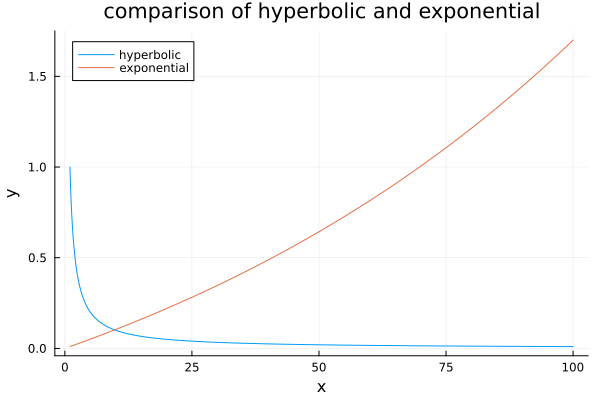

In [27]:
#= there are different backends to choose from
pyplot() # allows to use yguidefontrotation=-90
gr()
plotjs()
=#
p=1:0.1:100
g(x)=x^-1
gg(x)=2.7^(x/100)-1
q=g.(p)
qq=gg.(p)
plot(p,q,label="hyperbolic")
# ! implies that it is added to the current plot
plot!(p,qq,label="exponential")
xlabel!("x")
ylabel!("y")
title!("comparison of hyperbolic and exponential")

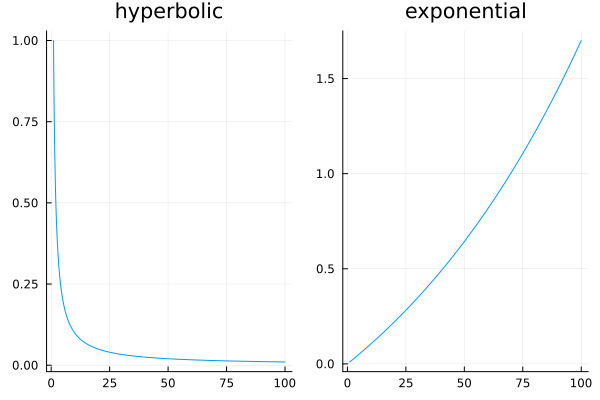

In [28]:
p=1:0.1:100
g(x)=x^-1
gg(x)=2.7^(x/100)-1
q=g.(p)
qq=gg.(p)
p1=plot(p,q,label="hyperbolic",title="hyperbolic")
# ! implies that it is added to the current plot
p2=plot(p,qq,label="exponential")
title!("exponential")
plot(p1,p2,layout=(1,2),legend=false)

In [29]:
function linearmodel(;y1=3,xo1=12,yo2=20,xc1=6,xc2=7,yc1=8,yc2=12,c1=100,c2=120)
    #example code from https://jump.dev/JuMP.jl/stable/tutorials/getting_started/getting_started_with_JuMP/
    model=Model(GLPK.Optimizer)
    set_silent(model)#set_optimizer_attribute(model,"print_level",0)#
    #region variables
    @variable(model,x>=0)
    @variable(model,0<=y<=y1)
    #endregion
    #region objective
    @objective(model,Min,xo1*x+yo2*y)
    #endregion
    #region contstraints
    @constraint(model,con1,xc1*x+yc1*y>=c1)
    @constraint(model,con2,xc2*x+yc2*y>=c2)
    #endregion
    #print(model)
    optimize!(model)
    if termination_status(model) != OPTIMAL
        #does not work for Ipopt
        @warn("The model was not solved correctly.")
        return
    end
    return Dict("status"=>termination_status(model),"status_primal"=>primal_status(model),"status_dual"=>dual_status(model),"objective"=>objective_value(model),"x"=>value(x),"y"=>value(y),"shadow1"=>shadow_price(con1),"shadow2"=>shadow_price(con2))
end
linearmodel()

Dict{String, Any} with 8 entries:
  "shadow2"       => -1.5
  "status_primal" => FEASIBLE_POINT
  "status"        => OPTIMAL
  "objective"     => 205.0
  "x"             => 15.0
  "shadow1"       => -0.25
  "status_dual"   => FEASIBLE_POINT
  "y"             => 1.25

There are a lot of ways a dataframe can be constructed. Too much to mention here. You do need consistent column lengths though.

One way to create a dataframe is through a dictionary (column names are the keywords and column vectors are the values of the dictionary). The values of the dataframe cannot be a scalar; it needs to be a vector.

In [2]:
df=DataFrame()
df.A=[1,missing,3]
df.B=[4,5,missing]
df.C=[missing,"y","z"]
df

Row,A,B,C
,Int64?,Int64?,String?
1,1,4,missing
2,missing,5,y
3,3,missing,z


In [4]:
dfl = dropmissing(df,Not(:C))

Row,A,B,C
,Int64,Int64,String?
1,1,4,missing


In [7]:
dfk=DataFrame()
for dfn in names(df)
    if dfn == "C"
        dfk[!,dfn]=replace(df[!,dfn],missing => "x")
    else
        dfk[!,dfn]=replace(df[!,dfn],missing => 0)
    end
end
dfk

Row,A,B,C
,Int64,Int64,String
1,1,4,x
2,0,5,y
3,3,0,z


In [3]:
dfxl=DataFrame(XLSX.readtable("./Data_Tars/RawData.xlsx","Tabelle1"))
#Dict(pairs(eachcol(dfxl)))

Row,Technology,Parameter,category,responsibility,remarks
,Any,Any,Any,Any,Any
1,electricity demand,missing,demand,T6?,missing
2,buildings,missing,demand,T8,missing
3,industry,missing,demand,T8,missing
4,nuclear fuel,missing,sources,T5,missing
5,coal,missing,sources,T5,missing
6,oil,missing,sources,T5,missing
7,bio oil,missing,sources,T4?,missing
8,synthetic oil,missing,sources,T4?,missing
9,natural gas,missing,sources,"Virgine (Fluxys, T2.5), Tars (KUL, T2.5)",missing


# Julia Study Group mod files
I suppose that the easiest way to play around with and show off our code is through here. Other ways, perhaps more on the coding side, are also welcome.

In [1]:
using DataFrames
include("./mod_Tars.jl")

In [2]:
iodb=mod_Tars.loadfile()
mod_Tars.savefile(iodb;iofile="Data_Tars/iofile_Tars_jupyter.json")
iodf=DataFrame(iodb["modelresults"])
mod_Tars.savefile(iodf;iofile="Data_Tars/iofile_Tars_jupyter.csv")
iodf

Row,objective,shadow1,shadow2,status,status_dual,status_primal,x,y
,Float64,Float64,Float64,String,String,String,Float64,Float64
1,205.0,-0.25,-1.5,OPTIMAL,FEASIBLE_POINT,FEASIBLE_POINT,15.0,1.25
